In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1)

b) Puedo decir que no es asimétrica ya que tienen misma esperanza, y se ve espejada. En cambio, no puedo concluír sobre su curtosis visualmente comparandola con las otras normales porque tienen distinta varianza. (ver `clase 1 comentarios.pdf` pag. 9 y `tp_1.ipynb`)

d) Veo que es leptocurtica, se notas las colas mas pesadas en los bordes

e) El QQ-plot muestra que es leptocurtica, ya que en los extremos vemos que una normal tendría una valor que se aleja menos de la media (|z| más cercano a 0) para un valor del mismo percentil. Dicho más sencillamente, los valores se despegan de la recta identidad.

In [2]:
def normal_pdf(x, mu, sigma):
    fraction = 1/(sigma*np.sqrt(2*np.pi))
    exp_term = -.5 * ((x-mu)/sigma)**2
    return fraction * np.exp(exp_term)

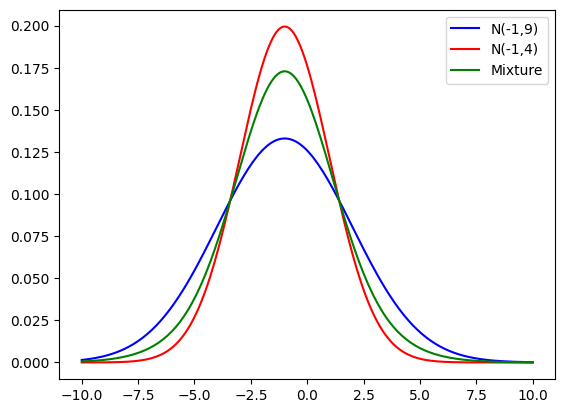

In [3]:
s = pd.Series(np.arange(-10,10.1,0.1))
s_norm_1 = normal_pdf(s, mu=-1, sigma=np.sqrt(9))
s_norm_2 = normal_pdf(s, mu=-1, sigma=np.sqrt(4))
mixtured = 0.4 * normal_pdf(s, mu=-1, sigma=np.sqrt(9)) + 0.6 * normal_pdf(s, mu=-1, sigma=np.sqrt(4))
plt.plot(s, s_norm_1, label='N(-1,9)', color='blue')
plt.plot(s, s_norm_2, label='N(-1,4)', color='red')
plt.plot(s, mixtured, label='Mixture', color='green')
plt.legend()
plt.show()

In [4]:
# Define the mixture parameters
p = np.array([0.4, 0.6])  # Mixture weights
mu_i = np.array([-1, -1])  # Means of the components
sigma_i = np.array([3, 2])  # Standard deviations of the components

# Mean of the mixture
mu = np.dot(p, mu_i)

# Variance of the mixture
var = np.dot(p, sigma_i**2 + mu_i**2) - mu**2

# Third central moment for skewness
m3 = np.dot(p, (mu_i - mu)**3 + 3*(mu_i - mu)*sigma_i**2)

# Skewness
skewness = m3 / var**1.5

# Fourth central moment for kurtosis
m4 = np.dot(p, 3*sigma_i**4 + 6*(mu_i - mu)**2 * sigma_i**2 + (mu_i - mu)**4)

# Kurtosis
kurtosis = m4 / var**2
excess_kurtosis = kurtosis - 3

print(f"Mixture mean: {mu:.4f}")
print(f"Mixture variance: {var:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Excess kurtosis: {excess_kurtosis:.4f}")

Mixture mean: -1.0000
Mixture variance: 6.0000
Skewness: 0.0000
Kurtosis: 3.5000
Excess kurtosis: 0.5000


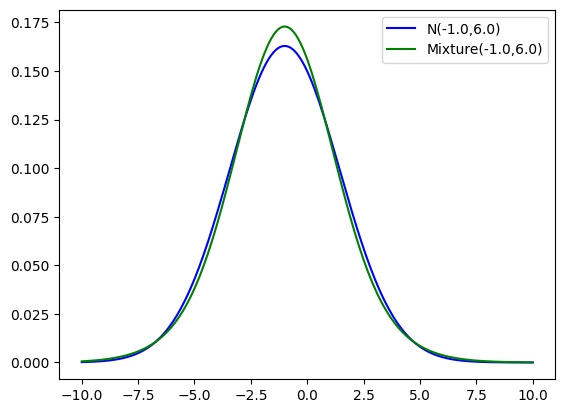

In [5]:
s = pd.Series(np.arange(-10,10.1,0.1))
s_norm_3 = normal_pdf(s, mu=mu, sigma=np.sqrt(var))
plt.plot(s, s_norm_3, label=f'N({mu:.1f},{var:.1f})', color='blue')
plt.plot(s, mixtured, label=f'Mixture({mu:.1f},{var:.1f})', color='green')
plt.legend()
plt.show()

Samplear de la mixtura es lo mismo que samplear de cada una de las normales que la componen pesando por su aporte a la mixtura.

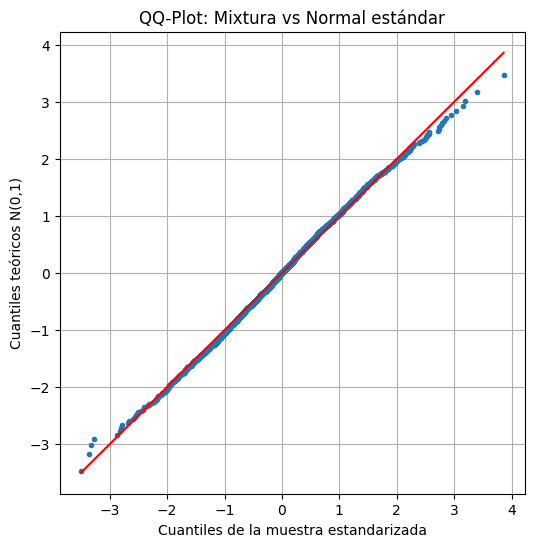

In [6]:
from scipy.stats import norm

# Generar muestra de 2000 valores
# Samplear de la mixtura es lo mismo que samplear de cada una de las normales que la componen pesando por su aporte a la mixtura.
u = np.random.rand(2000)
samples = np.where(u < p[0],
                   np.random.normal(mu_i[0], sigma_i[0], size=2000),
                   np.random.normal(mu_i[1], sigma_i[1], size=2000)
                )

# Estandarizar la muestra
z = (samples - mu) / var**0.5

# Cuantiles teóricos de la normal estándar
probabilidades = (np.arange(1, 2001) - 0.5) / 2000
cuantiles_teoricos = norm.ppf(probabilidades)

# Ordenar la muestra estandarizada
z_ordenado = np.sort(z)

# QQ-Plot (eje horizontal: muestra estandarizada; eje vertical: teóricos)
plt.figure(figsize=(6, 6))
plt.plot(z_ordenado, cuantiles_teoricos, marker='.', linestyle='none')
xmin = min(z_ordenado.min(), cuantiles_teoricos.min())
xmax = max(z_ordenado.max(), cuantiles_teoricos.max())
plt.plot([xmin, xmax], [xmin, xmax], 'r-', label='Línea identidad')
plt.xlabel('Cuantiles de la muestra estandarizada')
plt.ylabel('Cuantiles teóricos N(0,1)')
plt.title('QQ-Plot: Mixtura vs Normal estándar')
plt.grid(True)
plt.show()

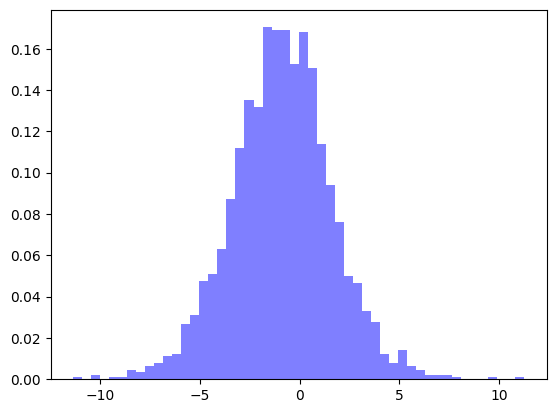

In [7]:
# CORRECTO
samples = np.where(u < p[0],
                   np.random.normal(mu_i[0], sigma_i[0], size=2000),
                   np.random.normal(mu_i[1], sigma_i[1], size=2000)
                )
plt.hist(samples, bins=50, density=True, alpha=0.5, color='blue', label='Samples')
plt.show()

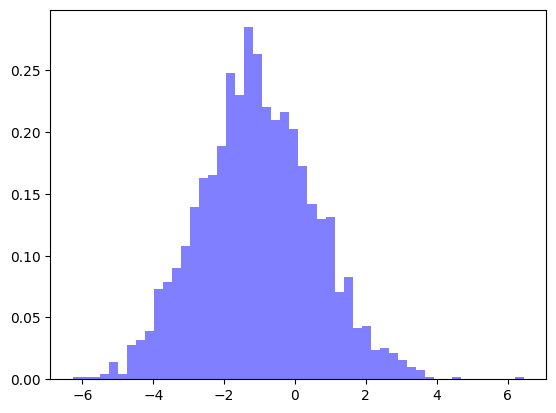

In [8]:
# INCORRECTO
samples = 0.35* np.random.normal(mu_i[0], sigma_i[0], size=2000) + 0.65* np.random.normal(mu_i[1], sigma_i[1], size=2000)
plt.hist(samples, bins=50, density=True, alpha=0.5, color='blue', label='Samples')
plt.show()

# 2) 
g) Puedo decir que es asimétrica positiva ya que se nota que tiene más densidada a la derecha.  No puedo concluír sobre su curtosis visualmente comparandola con las otras normales porque tienen distinta varianza

h) Es efectivamente asimetrica positiva (Skewness: 0.4194) y leptocúrtica (Excess kurtosis: 0.8619)

j) Se ve un movimiento ondular alrededor de la recta, lo cual ahora me hace pensar en una bimodalidad. Además, de nuevo vemos colas más pesadas.

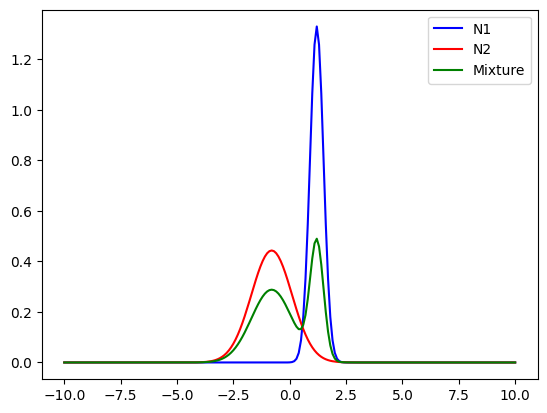

In [9]:
s = pd.Series(np.arange(-10,10.1,0.1))
s_norm_1 = normal_pdf(s, mu=1.2, sigma=np.sqrt(0.09))
s_norm_2 = normal_pdf(s, mu=-0.8, sigma=np.sqrt(0.81))
mixtured = 0.35 * s_norm_1 + 0.65 * s_norm_2
plt.plot(s, s_norm_1, label='N1', color='blue')
plt.plot(s, s_norm_2, label='N2', color='red')
plt.plot(s, mixtured, label='Mixture', color='green')
plt.legend()
plt.show()

In [10]:
# Define the mixture parameters
p = np.array([0.35, 0.65])  # Mixture weights
mu_i = np.array([1.2, -.8])  # Means of the components
sigma_i = np.array([np.sqrt(0.09), np.sqrt(0.81)])  # Standard deviations of the components

# Mean of the mixture
mu = np.dot(p, mu_i)

# Variance of the mixture
var = np.dot(p, sigma_i**2 + mu_i**2) - mu**2

# Third central moment for skewness
m3 = np.dot(p, (mu_i - mu)**3 + 3*(mu_i - mu)*sigma_i**2)

# Skewness
skewness = m3 / var**1.5

# Fourth central moment for kurtosis
m4 = np.dot(p, 3*sigma_i**4 + 6*(mu_i - mu)**2 * sigma_i**2 + (mu_i - mu)**4)

# Kurtosis
kurtosis = m4 / var**2
excess_kurtosis = kurtosis - 3

print(f"Mixture mean: {mu:.4f}")
print(f"Mixture variance: {var:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Excess kurtosis: {excess_kurtosis:.4f}")

Mixture mean: -0.1000
Mixture variance: 1.4680
Skewness: -0.2456
Kurtosis: 2.0004
Excess kurtosis: -0.9996


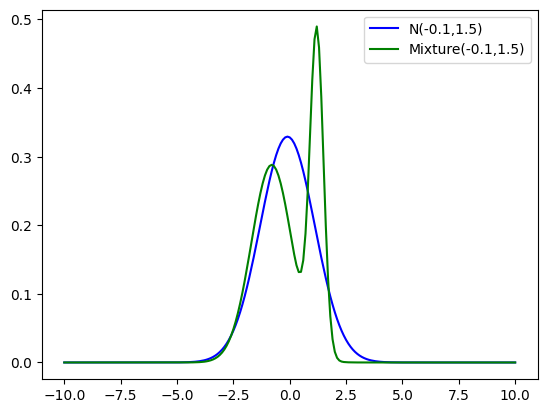

In [11]:
s = pd.Series(np.arange(-10,10.1,0.1))
s_norm_3 = normal_pdf(s, mu=mu, sigma=np.sqrt(var))
plt.plot(s, s_norm_3, label=f'N({mu:.1f},{var:.1f})', color='blue')
plt.plot(s, mixtured, label=f'Mixture({mu:.1f},{var:.1f})', color='green')
plt.legend()
plt.show()

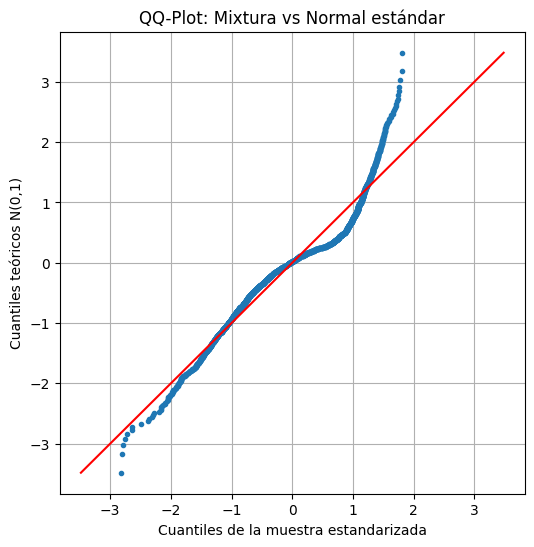

In [12]:
from scipy.stats import norm

# Generar muestra de 2000 valores
# Samplear de la mixtura es lo mismo que samplear de cada una de las normales que la componen pesando por su aporte a la mixtura.
u = np.random.rand(2000)
samples = np.where(u < p[0],
                   np.random.normal(mu_i[0], sigma_i[0], size=2000),
                   np.random.normal(mu_i[1], sigma_i[1], size=2000)
                )

# Estandarizar la muestra
z = (samples - mu) / var**0.5

# Cuantiles teóricos de la normal estándar
probabilidades = (np.arange(1, 2001) - 0.5) / 2000
cuantiles_teoricos = norm.ppf(probabilidades)

# Ordenar la muestra estandarizada
z_ordenado = np.sort(z)

# QQ-Plot (eje horizontal: muestra estandarizada; eje vertical: teóricos)
plt.figure(figsize=(6, 6))
plt.plot(z_ordenado, cuantiles_teoricos, marker='.', linestyle='none')
xmin = min(z_ordenado.min(), cuantiles_teoricos.min())
xmax = max(z_ordenado.max(), cuantiles_teoricos.max())
plt.plot([xmin, xmax], [xmin, xmax], 'r-', label='Línea identidad')
plt.xlabel('Cuantiles de la muestra estandarizada')
plt.ylabel('Cuantiles teóricos N(0,1)')
plt.title('QQ-Plot: Mixtura vs Normal estándar')
plt.grid(True)
plt.show()

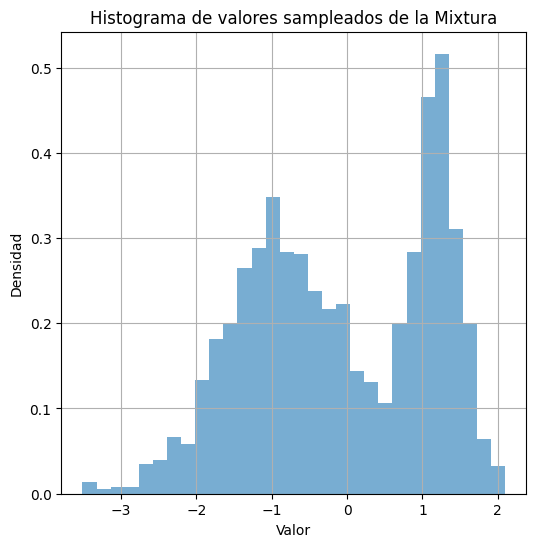

In [ ]:
plt.figure(figsize=(6, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Histograma de valores sampleados de la Mixtura')
plt.grid(True)
plt.show()

# 3)

y = yg + yc + e

donde:

y = valor del ln(PBI)

yg = media movil de y (componente tendencial)

yc = y - yg (componente cíclico)

e = ruido blanco

In [13]:
df = pd.read_excel("MIA103_Clase_2.xlsx", sheet_name=1).iloc[10:]
df.columns = ['observation_date', 'ano', 'GDP', 'ln_RGDP', 'yg', 'yc', 'yg3', 'nose']
df

,observation_date,ano,GDP,ln_RGDP,yg,yc,yg3,nose
10,1950-01-01 00:00:00,1950,196688.453125,12.189376,NaN,NaN,NaN,NaN
11,1951-01-01 00:00:00,1951,208305.203125,12.24676,NaN,NaN,NaN,NaN
12,1952-01-01 00:00:00,1952,195898.25,12.185351,NaN,NaN,NaN,NaN
13,1953-01-01 00:00:00,1953,204164.875,12.226683,NaN,NaN,12.255058,-0.028375
14,1954-01-01 00:00:00,1954,210812.5625,12.258725,NaN,NaN,12.283716,-0.024992
...,...,...,...,...,...,...,...,...
75,2015-01-01 00:00:00,2015,1017094.75,13.832461,NaN,NaN,13.819713,0.012748
76,2016-01-01 00:00:00,2016,995935.8125,13.811438,NaN,NaN,13.817367,-0.005929
77,2017-01-01 00:00:00,2017,1022513.25,13.837774,NaN,NaN,13.815101,0.022673
78,2018-01-01 00:00:00,2018,997136.625,13.812643,NaN,NaN,13.817018,-0.004375


In [32]:
from statsmodels.tsa.filters.hp_filter import hpfilter

df = pd.read_excel("MIA103_Clase_2.xlsx", sheet_name=1).iloc[10:]
df.columns = ['observation_date', 'ano', 'GDP', 'ln_RGDP', 'yg', 'yc', 'yg3', 'nose']

df['RGDP'] = df['GDP'] / df['GDP'].iloc[0]  # Normalizar el PBI real

# 1. Asegúrate de que observation_date sea datetime y ponlo como índice
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

# 2. Aplica el filtro HP sobre ln_RGDP (lambda=100)
#    Esto devuelve la tendencia y el componente cíclico
df['cycle'], df['trend'] = hpfilter(df['ln_RGDP'], lamb=100)

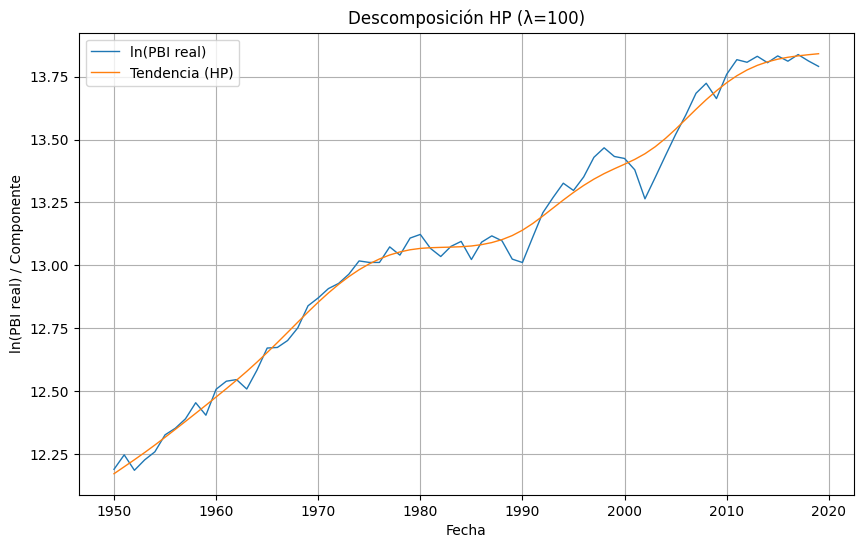

In [33]:
plt.figure(figsize=(10, 6))

# Serie original (log del PBI real)
plt.plot(df.index, df['ln_RGDP'], label='ln(PBI real)', linewidth=1)

# Componente tendencial
plt.plot(df.index, df['trend'],   label='Tendencia (HP)',   linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('ln(PBI real) / Componente')
plt.title ('Descomposición HP (λ=100)')
plt.legend()
plt.grid(True)
plt.show()

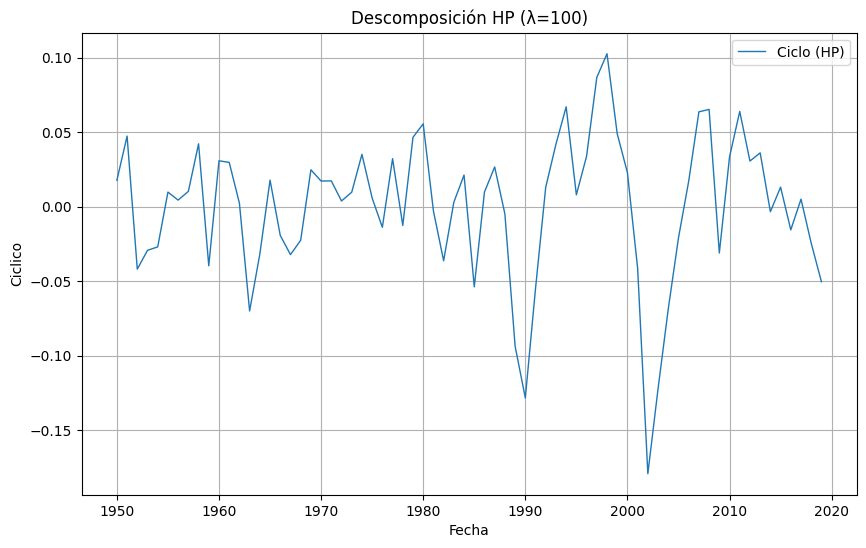

In [34]:
plt.figure(figsize=(10, 6))

# Componente cíclico
plt.plot(df.index, df['cycle'],   label='Ciclo (HP)',        linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Ciclico')
plt.title ('Descomposición HP (λ=100)')
plt.legend()
plt.grid(True)
plt.show()

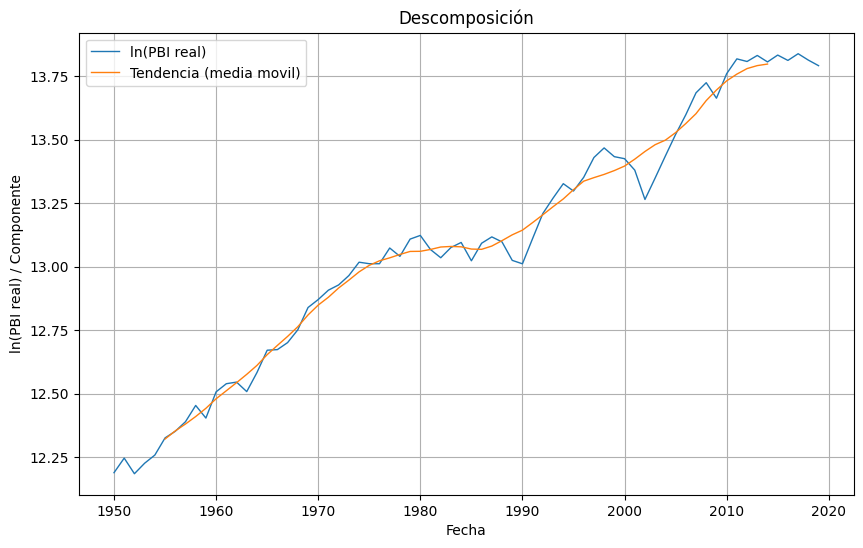

In [35]:
plt.figure(figsize=(10, 6))

# Serie original (log del PBI real)
plt.plot(df.index, df['ln_RGDP'], label='ln(PBI real)', linewidth=1)

# Componente tendencial
plt.plot(df.index, df['yg'],   label='Tendencia (media movil)',   linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('ln(PBI real) / Componente')
plt.title ('Descomposición')
plt.legend()
plt.grid(True)
plt.show()

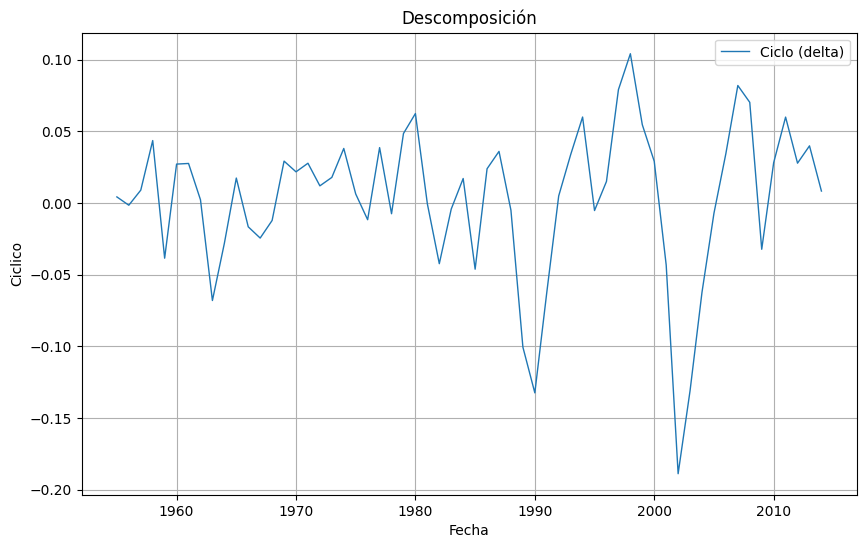

In [36]:
plt.figure(figsize=(10, 6))

# Componente cíclico
plt.plot(df.index, df['yc'],   label='Ciclo (delta)',        linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Ciclico')
plt.title ('Descomposición')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
df.corr().round(2)  # Rolling average y HP son casi iguales

,ano,GDP,ln_RGDP,yg,yc,yg3,nose,RGDP,cycle,trend
ano,1.00,0.96,0.98,0.99,0.03,0.99,0.03,0.96,-0.00,0.99
GDP,0.96,1.00,0.97,0.96,0.23,0.97,0.16,1.00,0.15,0.96
ln_RGDP,0.98,0.97,1.00,0.99,0.19,1.00,0.15,0.97,0.13,0.99
yg,0.99,0.96,0.99,1.00,0.07,1.00,0.02,0.96,0.06,1.00
yc,0.03,0.23,0.19,0.07,1.00,0.10,0.93,0.23,0.99,0.07
yg3,0.99,0.97,1.00,1.00,0.10,1.00,0.07,0.97,0.08,1.00
nose,0.03,0.16,0.15,0.02,0.93,0.07,1.00,0.16,0.92,0.06
RGDP,0.96,1.00,0.97,0.96,0.23,0.97,0.16,1.00,0.15,0.96
cycle,-0.00,0.15,0.13,0.06,0.99,0.08,0.92,0.15,1.00,0.03
trend,0.99,0.96,0.99,1.00,0.07,1.00,0.06,0.96,0.03,1.00
